In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import scipy.interpolate as interp
import pandas as pd
from sklearn.metrics import mean_squared_error 

from helpers import *
# ensure the notebook generate the same randomess
np.random.seed(1)

### Sprawdzenie opcji umiarkowanej

In [42]:
n = 100
r = 10000

In [ ]:
PoA_mean = []
PoA_min = []

for N in range(2,n): 
    v = np.random.uniform(0,1,(N,r))
    b_mean = bet_moderate(N, v)
    b_variance = produce_variance(b_mean, v)
    b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))

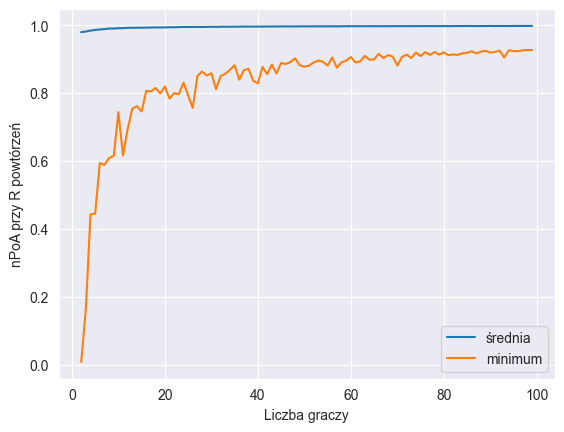

In [ ]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='lower right')
#plt.ylim(0, 1.05)
plt.savefig('moderate_second_price.png')

### Sprawdzenie Beta'' z overbettingiem

In [ ]:
PoA_mean = []
PoA_min = []

for N in range(2,n): 
    v = np.random.uniform(0,1,(N,r))
    b_mean = bet_Bayes_Nash_all_better(N, v)
    b_variance = produce_variance(b_mean, 1)
    b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))


In [ ]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='lower right')
#plt.ylim(0, 1.05)
plt.savefig('pictures/overbetting/better_all_pay.png')

### Sprawdzenie Beta'' bez overbettingu

In [ ]:
PoA_mean = []
PoA_min = []

for N in range(2,n): 
    v = np.random.uniform(0,1,(N,r))
    b_mean = bet_Bayes_Nash_all_better(N, v)
    b_variance = produce_variance(b_mean, v)
    b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))

In [ ]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='lower right')
#plt.ylim(0, 1.05)
plt.savefig('pictures/no_overbetting/better_all_pay.png')

### Statystyki porównawcze dla ofert z U(0,1)

In [ ]:
PoA_mean_uniform = []
PoA_min_uniform = []

for N in range(2,n): 
    v = np.random.uniform(0,1,(N,r))
    b = bet_random(v)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean_uniform.append(np.mean(PoA))
    PoA_min_uniform.append(min(PoA))

In [ ]:
n = 100
r = 1000
xs = list(np.linspace(start=0.0, stop=1, num=100))

### Szukanie lepszego wykładnika liniowo bez overbettingu

In [ ]:

MSE_best = np.inf
for x in xs:
    PoA_mean = []
    PoA_min = []
    for N in range(2,n):
        v = np.random.uniform(0,1,(N,r))
        b_mean = bet_between(N, v, x)
        b_variance = produce_variance(b_mean, v)
        b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
        winner=np.argmax(b, axis=0)
        Welf = v[winner, np.arange(r)]
        Opt =v.max(axis = 0)
        PoA = Welf/Opt
        PoA_mean.append(np.mean(PoA))
        PoA_min.append(min(PoA))
    MSE = mean_squared_error(PoA_min, PoA_min_uniform)
    if MSE < MSE_best:
        MSE_best = MSE
        x_best = x

In [ ]:
print(x_best)

In [ ]:
print(MSE_best)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 4.5))
x = list(range(2,n))

ax[0].plot(x,PoA_mean, label = 'średnia rozkład jednostajny', color = 'C0')
ax[0].plot(x,PoA_mean_uniform, label = 'średnia rozkład jednostajny', color = 'orange')
ax[0].set_ylim(0, 1.05)
ax[0].set_title('Średnia')
ax[0].set_xlabel("Liczba graczy")
ax[0].set_ylabel("nPoA przy 1000 powtórzeń")


ax[1].plot(x,PoA_min_uniform, color = 'orange')
ax[1].plot(x,PoA_min, color = 'C0')
ax[1].set_title('Minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
plt.ylim(0, 1.05)

plt.savefig('pictures/no_overbetting/universal_comparison_exp.png')

### Szukanie lepszego wykładnika liniowo z overbettingiem

In [ ]:

MSE_best = np.inf
for x in xs:
    PoA_mean = []
    PoA_min = []
    for N in range(2,n):
        v = np.random.uniform(0,1,(N,r))
        b_mean = bet_between(N, v, x)
        b_variance = produce_variance(b_mean, 1)
        b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
        winner=np.argmax(b, axis=0)
        Welf = v[winner, np.arange(r)]
        Opt =v.max(axis = 0)
        PoA = Welf/Opt
        PoA_mean.append(np.mean(PoA))
        PoA_min.append(min(PoA))
    MSE = mean_squared_error(PoA_min, PoA_min_uniform)
    if MSE < MSE_best:
        MSE_best = MSE
        x_best = x

In [ ]:
print(x_best)

In [ ]:
print(MSE_best)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 4.5))
x = list(range(2,n))

ax[0].plot(x,PoA_mean, label = 'średnia rozkład jednostajny', color = 'C0')
ax[0].plot(x,PoA_mean_uniform, label = 'średnia rozkład jednostajny', color = 'orange')
ax[0].set_ylim(0, 1.05)
ax[0].set_title('Średnia')
ax[0].set_xlabel("Liczba graczy")
ax[0].set_ylabel("nPoA przy 1000 powtórzeń")


ax[1].plot(x,PoA_min_uniform, color = 'orange')
ax[1].plot(x,PoA_min, color = 'C0')
ax[1].set_title('Minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
plt.ylim(0, 1.05)

plt.savefig('pictures/no_overbetting/universal_comparison_exp.png')

In [ ]:
### Szukanie lepszego wykładnika z logarytmem bez overbettingu

In [ ]:
xs = list(np.linspace(start=1.1, stop=2, num=101))
print(xs)

In [ ]:
MSE_best_log = np.inf

for x in xs:

    PoA_mean = []
    PoA_min = []
    for N in range(2,n):
        v = np.random.uniform(0,1,(N,r))
        b_mean = bet_Bayes_Nash_all_log(N, v, x)
        b_variance = produce_variance(b_mean, v)
        b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
        
        winner=np.argmax(b, axis=0)
        Welf = v[winner, np.arange(r)]
        Opt =v.max(axis = 0)
        PoA = Welf/Opt
        PoA_mean.append(np.mean(PoA))
        PoA_min.append(min(PoA))
    MSE_log = mean_squared_error(PoA_min, PoA_min_uniform)
    if MSE_log < MSE_best_log:
        MSE_best_log = MSE_log
        x_best_log = x

In [ ]:
PoA_mean = []
PoA_min = []

for N in range(2,n): 
    v = np.random.uniform(0,1,(N,r))
    b_mean = bet_Bayes_Nash_all_log(N, v, x_best_log)
    b_variance = produce_variance(b_mean, v)
    b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))

In [ ]:
print(MSE_best_log)
print(x_best_log)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 4.5))
x = list(range(2,n))

ax[0].plot(x,PoA_mean, label = 'średnia rozkład jednostajny', color = 'C0')
ax[0].plot(x,PoA_mean_uniform, label = 'średnia rozkład jednostajny', color = 'orange')
ax[0].set_ylim(0, 1.05)
ax[0].set_title('Średnia')
ax[0].set_xlabel("Liczba graczy")
ax[0].set_ylabel("nPoA przy R powtórzeń")


ax[1].plot(x,PoA_min_uniform, color = 'orange')
ax[1].plot(x,PoA_min, color = 'C0')
ax[1].set_title('Minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
plt.ylim(0, 1.05)

plt.savefig('pictures/no_overbetting/universal_comparison_log.png')

### Szukanie lepszego wykładnika z logarytmem z overbettingiem

In [ ]:
MSE_best_log = np.inf

for x in xs:

    PoA_mean = []
    PoA_min = []
    for N in range(2,n):
        v = np.random.uniform(0,1,(N,r))
        b_mean = bet_Bayes_Nash_all_log(N, v, x)
        b_variance = produce_variance(b_mean, v)
        b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
        
        winner=np.argmax(b, axis=0)
        Welf = v[winner, np.arange(r)]
        Opt =v.max(axis = 0)
        PoA = Welf/Opt
        PoA_mean.append(np.mean(PoA))
        PoA_min.append(min(PoA))
    MSE_log = mean_squared_error(PoA_min, PoA_min_uniform)
    if MSE_log < MSE_best_log:
        MSE_best_log = MSE_log
        x_best_log = x

In [ ]:
PoA_mean = []
PoA_min = []

for N in range(2,n): 
    v = np.random.uniform(0,1,(N,r))
    b_mean = bet_Bayes_Nash_all_log(N, v, x_best_log)
    b_variance = produce_variance(b_mean, 1)
    b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))

In [ ]:
print(MSE_best_log)
print(x_best_log)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 4.5))
x = list(range(2,n))

ax[0].plot(x,PoA_mean, label = 'średnia rozkład jednostajny', color = 'C0')
ax[0].plot(x,PoA_mean_uniform, label = 'średnia rozkład jednostajny', color = 'orange')
ax[0].set_ylim(0, 1.05)
ax[0].set_title('Średnia')
ax[0].set_xlabel("Liczba graczy")
ax[0].set_ylabel("nPoA przy R powtórzeń")


ax[1].plot(x,PoA_min_uniform, color = 'orange')
ax[1].plot(x,PoA_min, color = 'C0')
ax[1].set_title('Minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
plt.ylim(0, 1.05)

plt.savefig('pictures/overbetting/universal_comparison_log.png')